# Análisis de Datos
 ## Se visualizan los datos importados y preprocesados con anterioridad.
 
 ### Trabajo de Fin de Grado - Universidad de Burgos
 #### Jesús García Armario

In [2]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Cargamos los datos
df = pd.read_csv('Listados_Preprocesados\\ListadoInterv_Preprocesado.csv')
# Visualizamos la estructura de los datos
df.head()

,NHC,INTERVENCIÓN,TIPO,TURNO,CARÁCTER ECONÓMICO,PONDERACIÓN,DURACIÓN,ESPECIALIDAD
0,1000738,86.7,1,1,33,33,29,PLASTICA
1,1001107,86.4,1,0,36,36,33,PLASTICA
2,1001240,86.4,1,0,18,7,65,PLASTICA
3,1001395,86.4,1,0,55,55,60,PLASTICA
4,1001623,86.7,1,1,146,146,42,PLASTICA


In [3]:
# Visualizamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25493 entries, 0 to 25492
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NHC                 25493 non-null  int64  
 1   INTERVENCIÓN        25493 non-null  float64
 2   TIPO                25493 non-null  int64  
 3   TURNO               25493 non-null  int64  
 4   CARÁCTER ECONÓMICO  25493 non-null  int64  
 5   PONDERACIÓN         25493 non-null  int64  
 6   DURACIÓN            25493 non-null  int64  
 7   ESPECIALIDAD        25493 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 1.6+ MB


TRAUMATOLOGIA           9390
PLASTICA                4761
GENERAL                 3263
MAXILOFACIAL            3206
OTORRINOLARINGOLOGIA    2142
NEUROCIRUGIA            1934
TORACICA                 797
Name: ESPECIALIDAD, dtype: int64


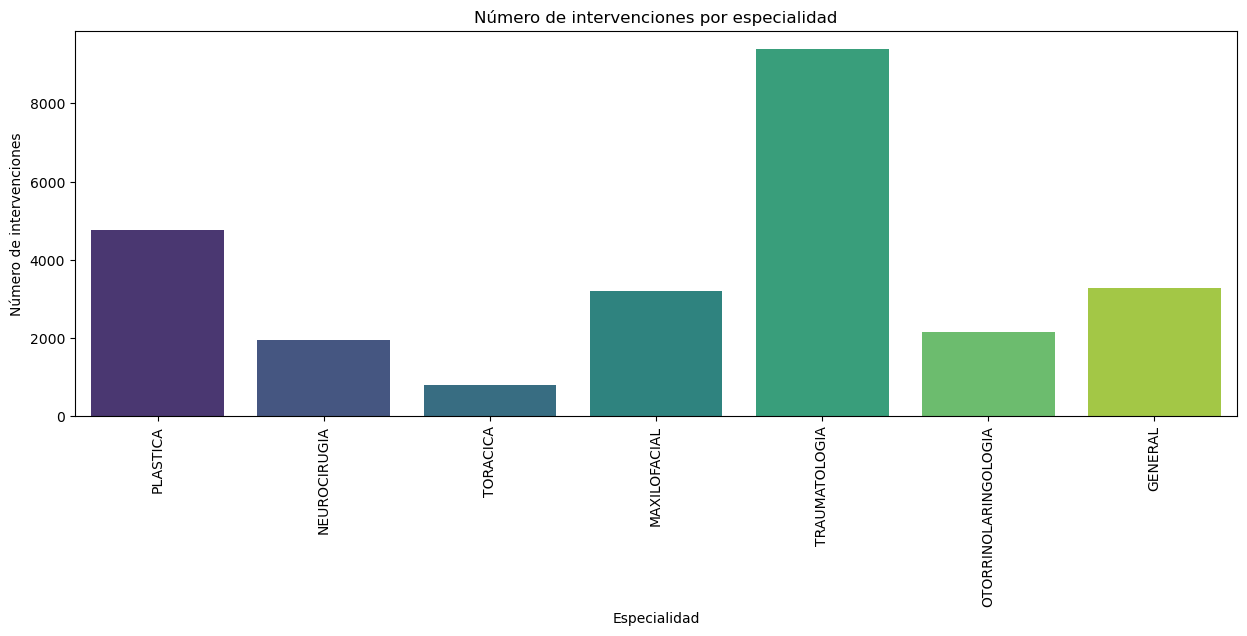

In [3]:
# Mostramos una tabla con el número de intervenciones por especialidad
print(df['ESPECIALIDAD'].value_counts())
# Mostramos el número de intervenciones por especialidad
# Lo mostramos en un gráfico, con colores diferentes para cada especialidad
plt.figure(figsize=(15,5))
sns.countplot(x='ESPECIALIDAD', data=df, palette='viridis')
plt.title('Número de intervenciones por especialidad')
plt.xlabel('Especialidad')
plt.ylabel('Número de intervenciones')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='TIPO', ylabel='count'>

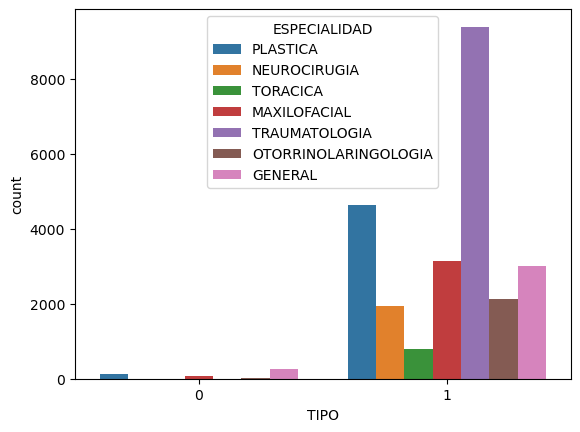

In [5]:
# Vemos si hay relación entre la especialidad y el tipo de intervención
# Lo mostramos en un gráfico
sns.countplot(x='TIPO', hue='ESPECIALIDAD', data=df)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'PLASTICA'),
  Text(1, 0, 'NEUROCIRUGIA'),
  Text(2, 0, 'TORACICA'),
  Text(3, 0, 'MAXILOFACIAL'),
  Text(4, 0, 'TRAUMATOLOGIA'),
  Text(5, 0, 'OTORRINOLARINGOLOGIA'),
  Text(6, 0, 'GENERAL')])

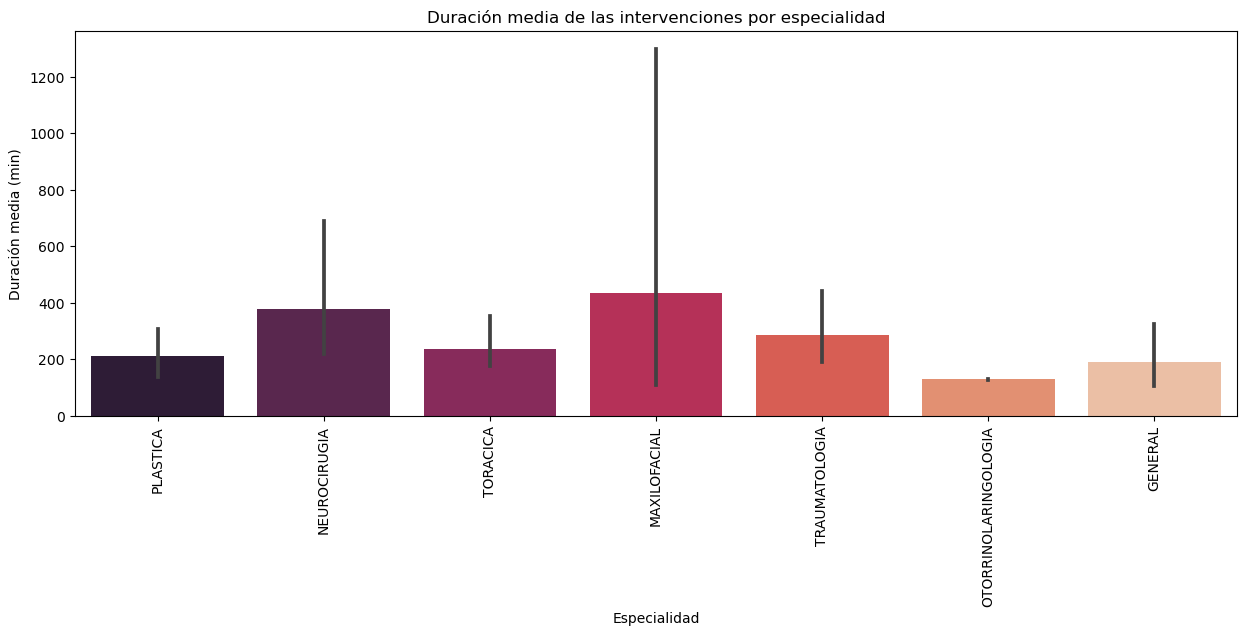

In [6]:
# Realizamos un gráfico que compare el la duración media de las intervenciones por especialidad
# Cada especialidad en un color distinto
# Y lo exportamos a un archivo png
plt.figure(figsize=(15,5))
sns.barplot(x='ESPECIALIDAD', y='DURACIÓN', data=df, palette='rocket')
plt.title('Duración media de las intervenciones por especialidad')
plt.xlabel('Especialidad')
plt.ylabel('Duración media (min)')
plt.xticks(rotation=90)

In [12]:
# Calculamos si la diferencia de medias es significativa
# Para ello, realizamos un test de ANOVA
# Dado que la N es muy grande, podemos asumir que la distribución es normal
# Y que las varianzas son iguales
# Por lo que podemos realizar un test de ANOVA
# ANOVA: Análisis de la varianza

# Primero, calculamos las medias de cada especialidad
# Y las guardamos en un diccionario
medias = {}
for especialidad in df['ESPECIALIDAD'].unique():
    medias[especialidad] = df[df['ESPECIALIDAD'] == especialidad]['DURACIÓN'].mean()
# Mostramos las medias
print(medias)
# Obtenemos los valores de ESPECIALIDAD
especialidades = df['ESPECIALIDAD'].unique()
# Obtenemos una referencia a la columna DURACIÓN por cada especialidad
# Y guardamos los valores en una lista
valores = []
for especialidad in especialidades:
    valores.append(df[df['ESPECIALIDAD'] == especialidad]['DURACIÓN'].values)
# Realizamos el test de ANOVA
# Y mostramos los resultados
print(stats.f_oneway(*valores))

{'PLASTICA': 211.193656794791, 'NEUROCIRUGIA': 376.9467425025853, 'TORACICA': 236.75156838143036, 'MAXILOFACIAL': 432.898315658141, 'TRAUMATOLOGIA': 287.58679446219384, 'OTORRINOLARINGOLOGIA': 128.62885154061624, 'GENERAL': 190.0003064664419}
F_onewayResult(statistic=0.5720889262783162, pvalue=0.7529180450881683)


<AxesSubplot:>

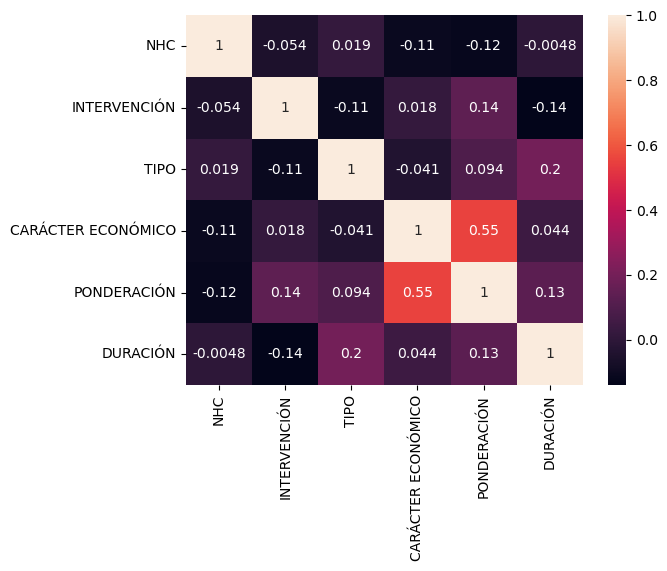

In [7]:
# Determinamos la correlación de Spearman entre las variables
sns.heatmap(df.corr(method='spearman'), annot=True)

<AxesSubplot:>

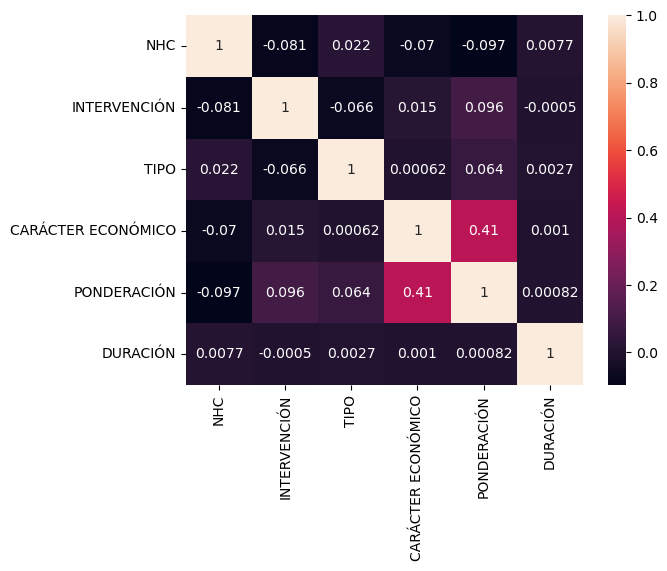

In [8]:
# Determinamos la correlación de Pearson entre las variables
sns.heatmap(df.corr(method='pearson'), annot=True)